In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import seaborn as sns
import sys
import re
import os
from sklearn import feature_extraction
from glob import glob
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
%matplotlib inline

In [3]:
file_list=[' Patents侵權2.txt',
 'apple控告侵權1.txt',
 'apple控告侵權10.txt',
 'apple控告侵權2.txt',
 'apple控告侵權3.txt',
 'apple控告侵權4.txt',
 'apple控告侵權5.txt',
 'apple控告侵權6.txt',
 'apple控告侵權7.txt',
 'apple控告侵權8.txt',
 'apple控告侵權9.txt',
 'google收購1.txt',
 'google收購10.txt',
 'google收購11.txt',
 'google收購12.txt',
 'google收購13.txt',
 'Google收購2.txt',
 'google收購3.txt',
 'google收購4.txt',
 'google收購5.txt',
 'google收購6.txt',
 'Google收購7.txt',
 'Google收購8.txt',
 'google收購9.txt',
 'htc vr1.txt',
 'htc侵權4.txt',
 'htc侵權6.txt',
 'htc侵權7.txt',
 'htc前進中國市場1.txt',
 'htc前進中國市場2.txt',
 'htc前進中國市場3.txt',
 'htc前進中國市場4.txt',
 'htc前進中國市場5.txt',
 'htc前進中國市場6.txt',
 'htc前進中國市場7.txt',
 'htc前進中國市場8.txt',
 'htc前進中國市場9.txt',
 'htc前進大陸市場10.txt',
 'htc品牌決策1.txt',
 'htc品牌決策10.txt',
 'htc品牌決策2.txt',
 'htc品牌決策3.txt',
 'htc品牌決策4.txt',
 'htc品牌決策5.txt',
 'htc品牌決策6.txt',
 'htc品牌決策7.txt',
 'htc品牌決策8.txt',
 'htc品牌決策9.txt',
 'Nokia控告侵權1.txt',
 'Nokia控告侵權10.txt',
 'Nokia控告侵權2.txt',
 'Nokia控告侵權3.txt',
 'Nokia控告侵權4.txt',
 'Nokia控告侵權5.txt',
 'Nokia控告侵權6.txt',
 'Nokia控告侵權7.txt',
 'Nokia控告侵權8.txt',
 'Nokia控告侵權9.txt',
 'Patents侵權1.txt',
 'patents專利侵權3.txt',
 '供應鏈1.txt',
 '供應鏈2.txt',
 '供應鏈3.txt',
 '供應鏈4.txt',
 '供應鏈5.txt',
 '內賊2.txt',
 '內鬼1.txt',
 '内鬼10.txt',
 '内鬼11.txt',
 '内鬼12.txt',
 '内鬼3.txt',
 '内鬼4.txt',
 '内鬼5.txt',
 '内鬼6.txt',
 '内鬼7.txt',
 '内鬼8.txt',
 '内鬼9.txt',
 '區塊鏈手機1.txt',
 '區塊鏈手機2.txt',
 '區塊鏈手機3.txt',
 '品牌時期1.txt',
 '品牌時期10.txt',
 '品牌時期2.txt',
 '品牌時期3.txt',
 '品牌時期4.txt',
 '品牌時期5.txt',
 '品牌時期6.txt',
 '品牌時期7.txt',
 '品牌時期8.txt',
 '品牌時期9.txt',
 '專利4.txt',
 '專利5.txt',
 '專利6.txt',
 '專利7.txt']
# data = pd.DataFrame(tfidf_matrix.toarray().T, index = words, columns = title)
# data.head()


In [4]:
data = pd.read_csv('Matrix.csv',encoding="utf-8")
data=data.iloc[:,1:]
ssort=np.mean(data,axis=0)
ten=sorted(ssort.items(),key=lambda item:item[1],reverse=True)
ten

[('的', 38.12765957446808),
 ('。', 21.5531914893617),
 ('HTC', 16.20212765957447),
 ('在', 10.808510638297872),
 ('、', 7.372340425531915),
 ('了', 6.861702127659575),
 ('是', 6.797872340425532),
 ('手機', 6.574468085106383),
 ('與', 4.872340425531915),
 ('也', 4.25531914893617),
 ('年', 4.117021276595745),
 ('「', 3.6808510638297873),
 ('」', 3.6808510638297873),
 ('市場', 3.6808510638297873),
 ('專利', 3.5425531914893615),
 ('對', 3.521276595744681),
 ('於', 3.404255319148936),
 ('和', 3.095744680851064),
 ('公司', 3.0),
 ('月', 2.9574468085106385),
 ('有', 2.9468085106382977),
 ('為', 2.5106382978723403),
 ('上', 2.4574468085106385),
 ('蘋果', 2.404255319148936),
 ('但', 2.393617021276596),
 ('後', 2.382978723404255),
 ('而', 2.3085106382978724),
 ('產品', 2.297872340425532),
 ('Google', 2.2872340425531914),
 ('\u3000', 2.1702127659574466),
 ('品牌', 2.0638297872340425),
 ('到', 2.0425531914893615),
 ('都', 1.946808510638298),
 ('Apple', 1.9361702127659575),
 ('來', 1.9361702127659575),
 ('宏達電', 1.8404255319148937),
 (

In [5]:
data=data[['手機','市場','專利','公司','蘋果','產品','Google','品牌','Apple','宏達電','Android','全球','侵權','設計','三星','智能','訴訟','台灣','美國','王雪紅','簡志霖','VR','合作','One','美元','技術','谷歌','智慧型','消費者','中國','收購','競爭','研發','Nokia','侵犯','Pixel','印度','成本','營運','雲端','M9','中興','平板','整合','改變','軟件','LG','OPPO','VIVE','創意','北美','威盛','晶片','支付','英國','互聯網','股王','Galaxy','貿易委員會','軟體','出貨量','契約','秘密','RAM','專利權','廣告','惠普','時代','華為','高階','Facebook','日本','安卓','競爭力','PDA','SAMSUNG','裝置','Samsung','高通','驍龍','戰略','數據','服務','實境','Desire','HTC10','Ultra','人才','價格','歐洲','經濟','螢幕','國際','投資','區塊','策略','創新','媒體','行銷','Vive','代工','判決','遊戲','手機業務','硬體','微軟','小米','虧損','平台','虛擬','機密','股價','諾基亞','中國大陸','世界','國內','市值','伺服器']]
#data=data[ten.iloc[:100][0]]

In [6]:
data = pd.read_csv('Matrix.csv',encoding="utf-8")
data=data.iloc[:,1:]
data=data[['手機','市場','專利','公司','蘋果','產品','Google','品牌','Apple','宏達電','Android','全球','侵權','設計','三星','智能','訴訟','台灣','美國','王雪紅','簡志霖','VR','合作','One','美元','技術','谷歌','智慧型','消費者','中國','收購','競爭','研發','Nokia','侵犯','Pixel','印度','成本','營運','雲端','M9','中興','平板','整合','改變','軟件','LG','OPPO','VIVE','創意','北美','威盛','晶片','支付','英國','互聯網','股王','Galaxy','貿易委員會','軟體','出貨量','契約','秘密','RAM','專利權','廣告','惠普','時代','華為','高階','Facebook','日本','安卓','競爭力','PDA','SAMSUNG','裝置','Samsung','高通','驍龍','戰略','數據','服務','實境','Desire','HTC10','Ultra','人才','價格','歐洲','經濟','螢幕','國際','投資','區塊','策略','創新','媒體','行銷','Vive','代工','判決','遊戲','手機業務','硬體','微軟','小米','虧損','平台','虛擬','機密','股價','諾基亞','中國大陸','世界','國內','市值','伺服器']]
#data=data[ten.iloc[:100][0]]
data.head()

,手機,市場,專利,公司,蘋果,產品,Google,品牌,Apple,宏達電,...,平台,虛擬,機密,股價,諾基亞,中國大陸,世界,國內,市值,伺服器
0,0.0,0.0,5.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.0,7.0,54.0,5.0,3.0,19.0,16.0,4.0,63.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.0,6.0,19.0,11.0,0.0,5.0,40.0,0.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
3,2.0,5.0,26.0,1.0,2.0,4.0,3.0,0.0,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,6.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data.values)
#data_std=np.transpose(data_std)

In [8]:
data_std.shape

(94, 118)

In [9]:
pca = PCA(n_components=7)
x_7d = pca.fit_transform(data_std)
print(x_7d.shape)

(94, 7)


In [10]:
pca4 = PCA(n_components=4)
x_4d = pca.fit_transform(data_std)
x_4d

array([[-2.10575958e+00, -1.51548768e+00,  2.36455575e-01,
         1.48992884e-01, -1.18310660e+00, -4.03461911e-01,
         1.18160933e+00],
       [ 1.39703058e+01, -1.42200943e+01,  3.48363918e+00,
         1.77754182e+00, -2.28368019e+00,  4.28865329e-01,
        -3.01091658e+00],
       [ 1.11550102e+01, -9.87588344e+00, -1.42133868e+00,
         2.76632982e+00, -4.81751051e+00, -3.57625407e+00,
        -5.55055637e+00],
       [ 4.68436683e+00, -5.82403501e+00, -6.73374865e-01,
         1.33654089e-02, -4.15936881e+00, -4.40183642e-01,
         3.19195155e+00],
       [-2.90711754e+00, -1.42616144e+00,  7.24781175e-01,
         4.70207480e-01, -7.87807611e-01,  1.24635476e-02,
         5.96502611e-01],
       [ 2.21219679e-01, -2.04983025e+00, -1.17205873e+00,
         2.22855456e-01, -8.73434626e-01,  1.72960192e+00,
         1.70669437e+00],
       [-2.76742207e+00, -1.04213226e+00,  2.78045999e-01,
         2.61051578e-01, -9.29721664e-01,  2.07886855e-01,
         6.9118422

0 1


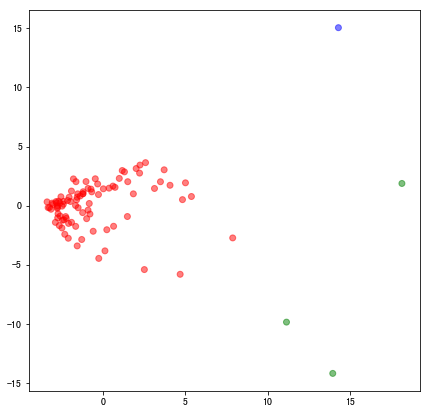

0 2


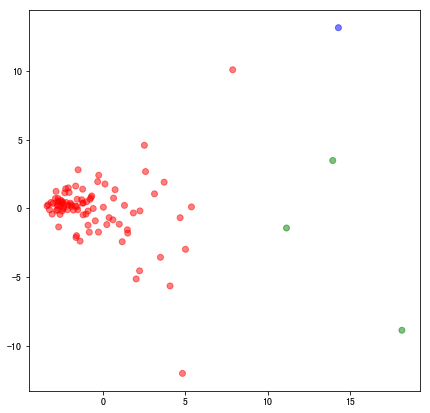

0 3


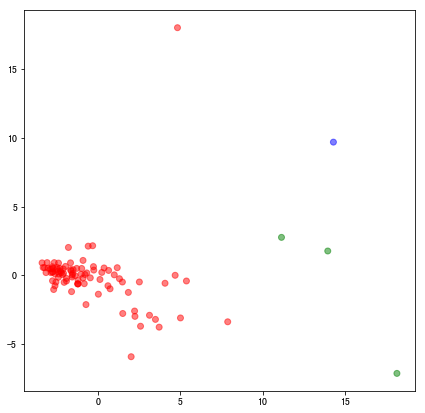

0 4


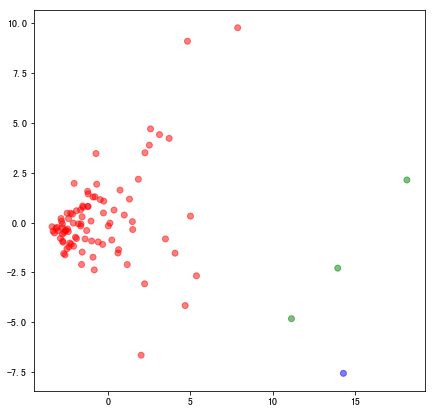

0 5


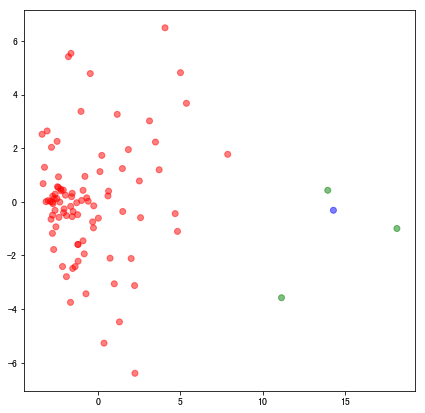

0 6


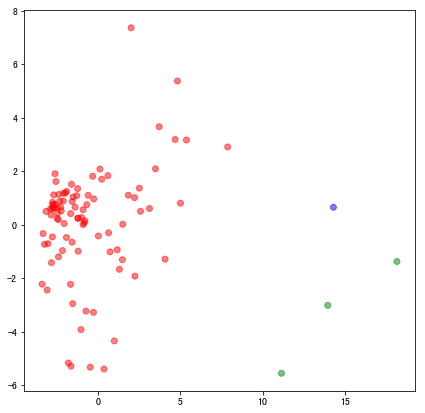

1 2


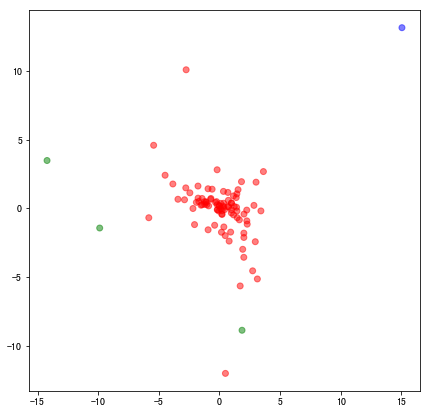

1 3


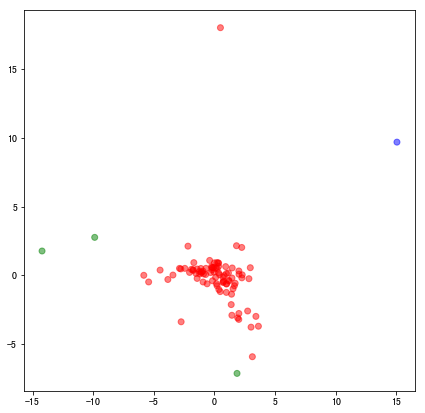

1 4


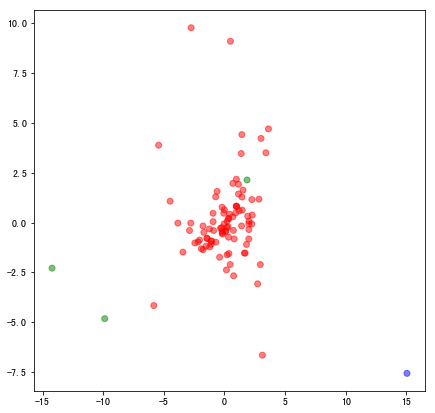

1 5


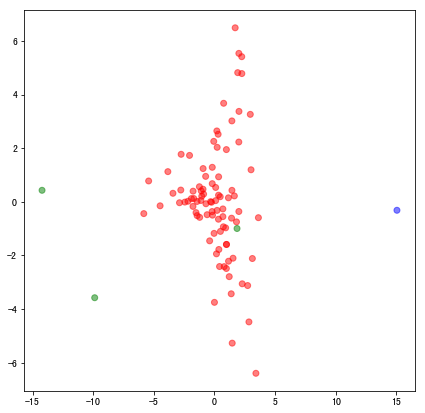

1 6


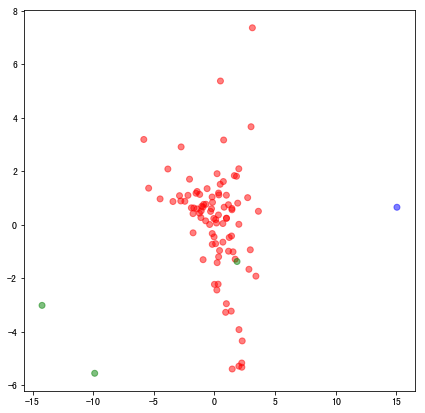

2 3


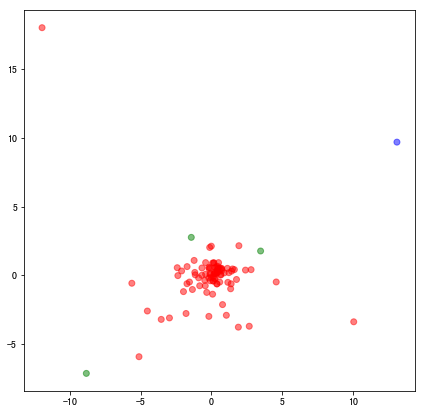

2 4


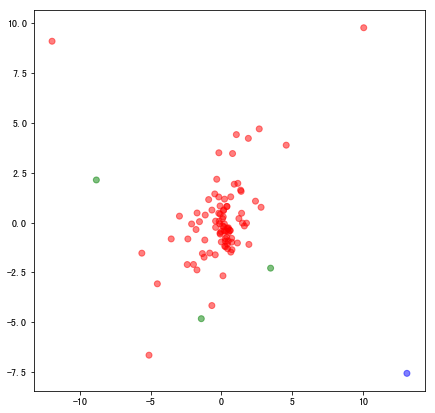

2 5


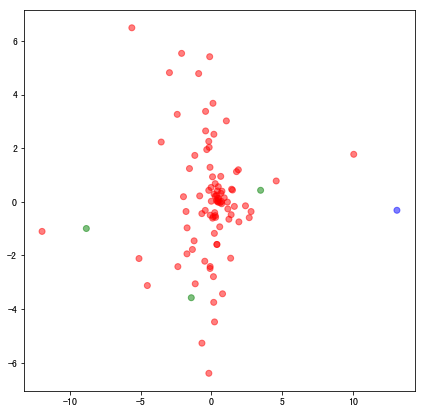

2 6


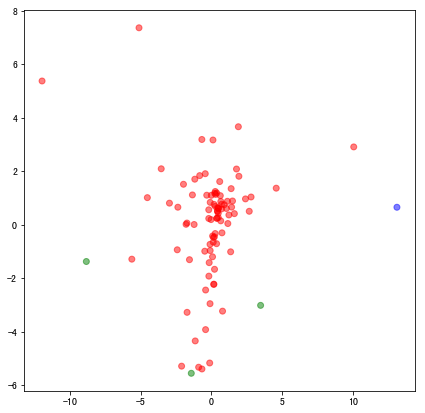

3 4


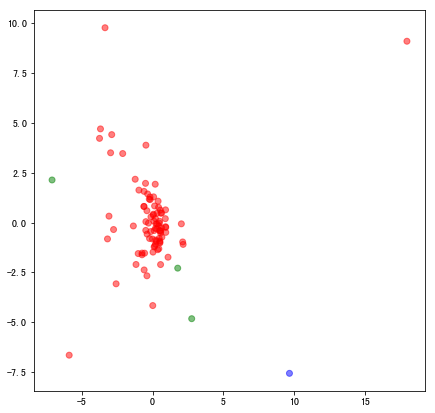

3 5


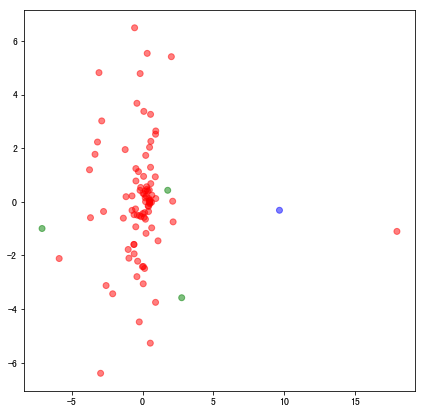

3 6


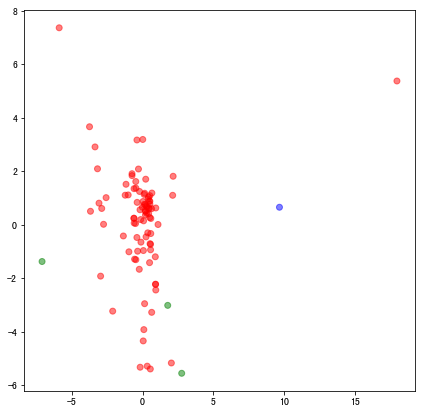

4 5


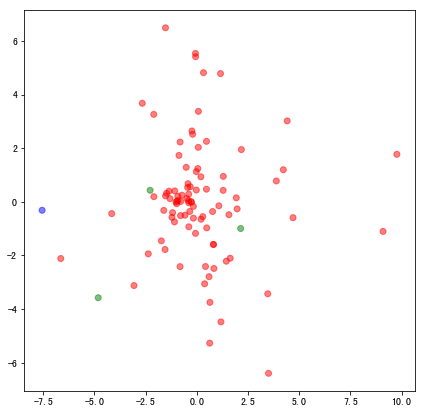

4 6


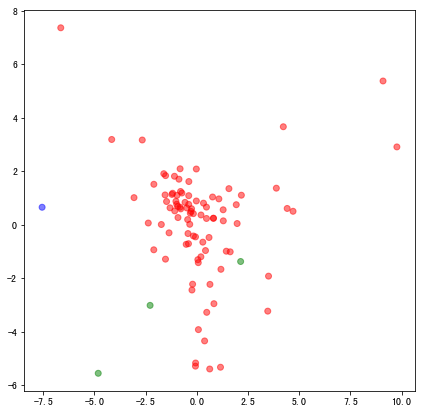

5 6


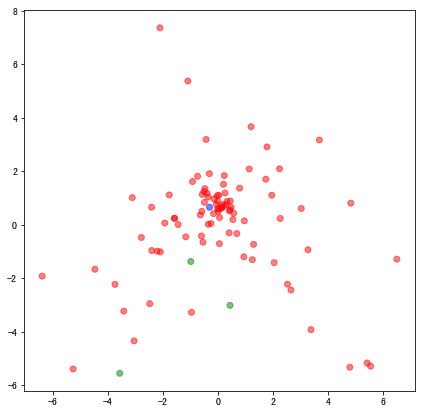

In [11]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
for i in range(7):
    for j in range(i+1,7):
        print(i,j)
        plt.figure(figsize = (7,7))
        plt.scatter(x_7d[:,i],x_7d[:,j], c= label_color, alpha=0.5) 
        plt.show()

In [14]:
#k:apple控告侵權 violet:google收購 r:htc侵權 tan:htc前進中國市場 gold:htc品牌決策 y:Nokia控告侵權 m:供應鏈 g:內鬼 c:區塊鏈手機 b:品牌時期 skyblue:專利  navy  purple m pink
#簡化 c:新品專利 k:侵權
label_color=['k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'c',
 'k',
 'k',
 'k',
 'tan',
 'tan',
 'tan',
 'tan',
 'tan',
 'tan',
 'tan',
 'tan',
 'tan',
 'tan',
 'gold',
 'gold',
 'gold',
 'gold',
 'gold',
 'gold',
 'gold',
 'gold',
 'gold',
 'gold',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'm',
 'm',
 'm',
 'm',
 'm',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'c',
 'c',
 'c',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'c',
 'c',
 'c',
 'c']

0 1


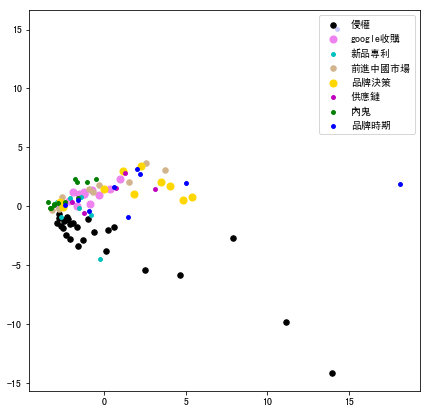

0 2


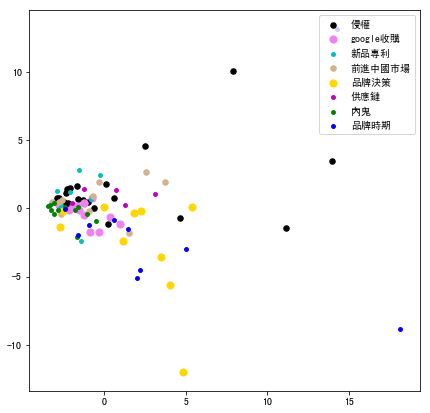

0 3


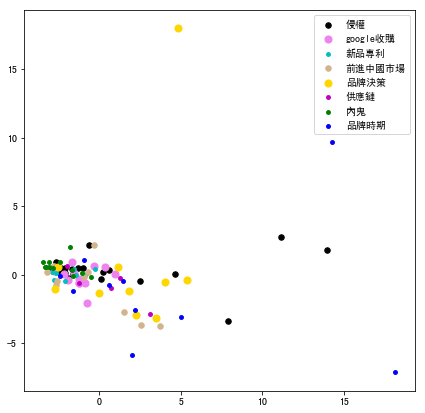

0 4


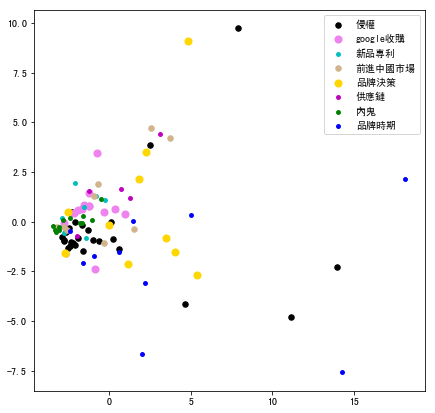

0 5


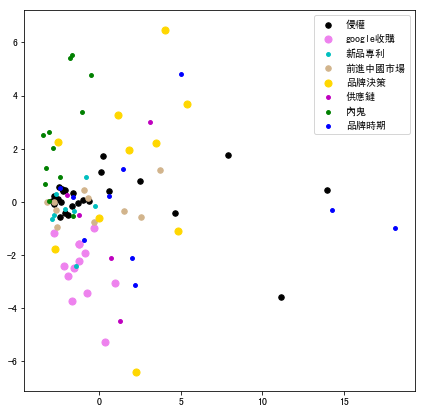

0 6


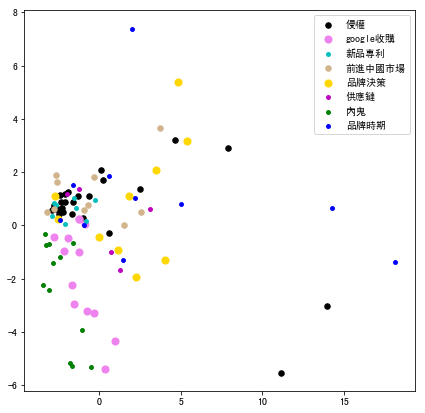

1 2


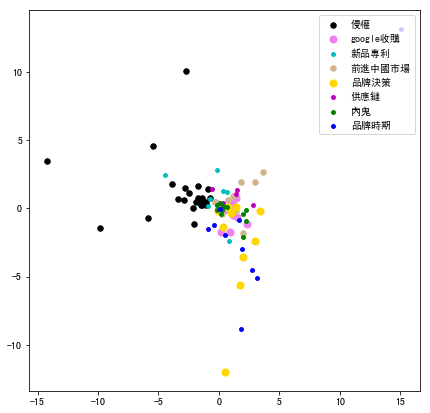

1 3


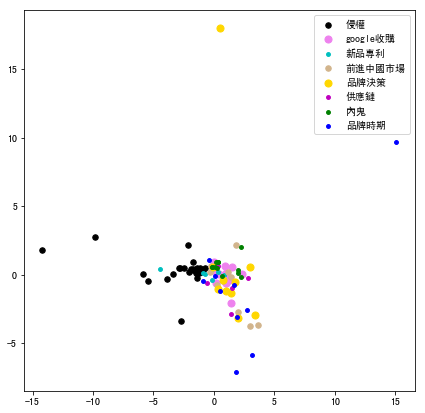

1 4


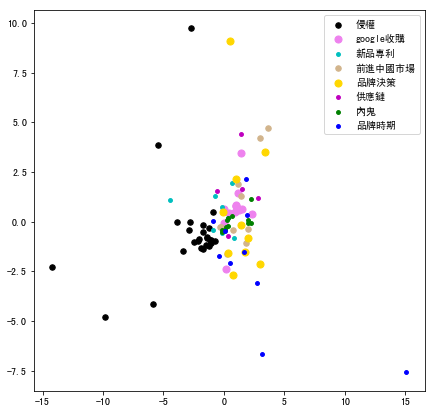

1 5


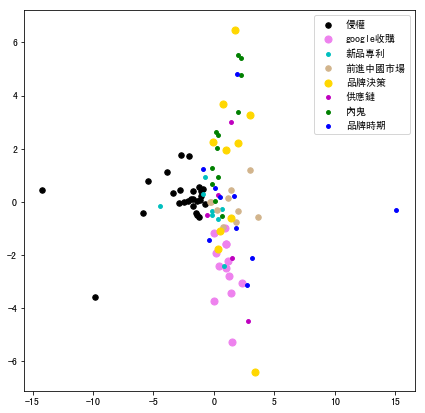

1 6


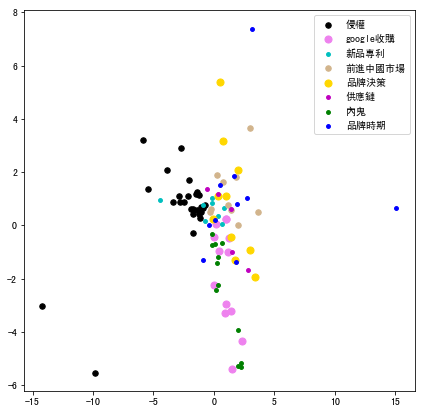

2 3


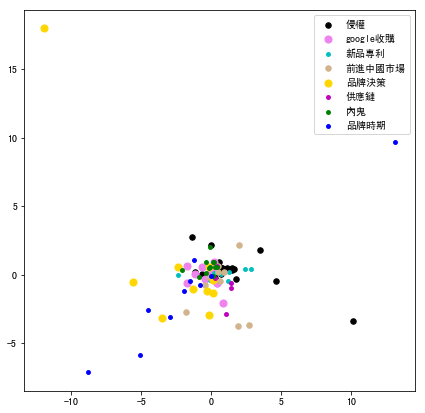

2 4


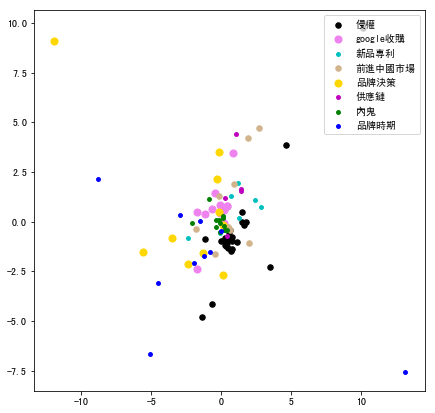

2 5


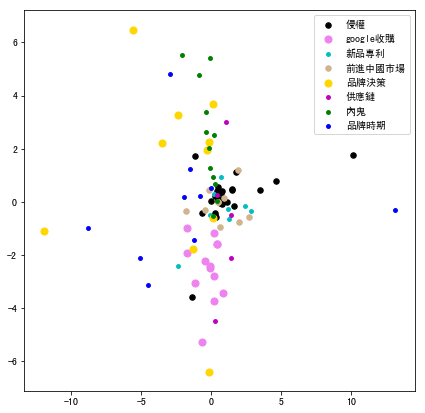

2 6


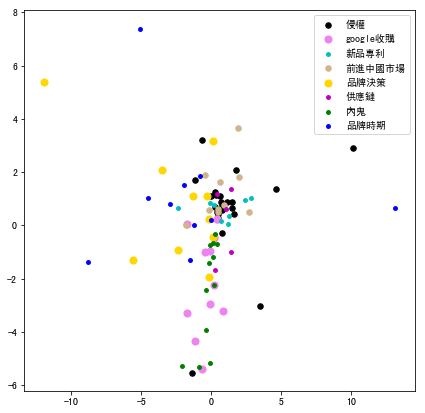

3 4


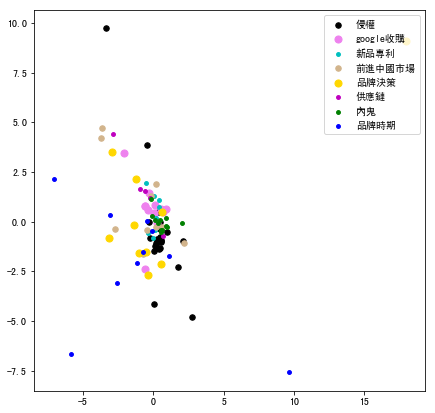

3 5


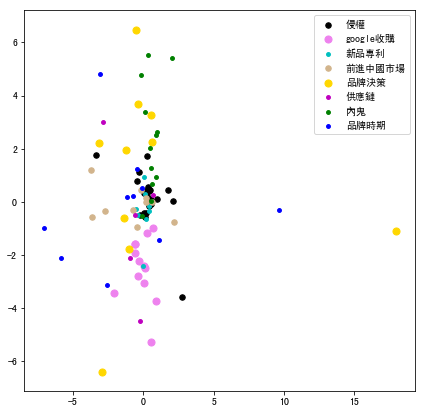

3 6


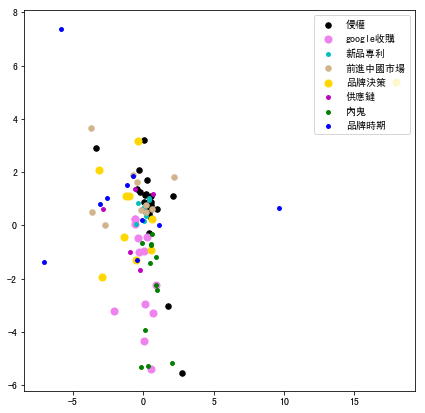

4 5


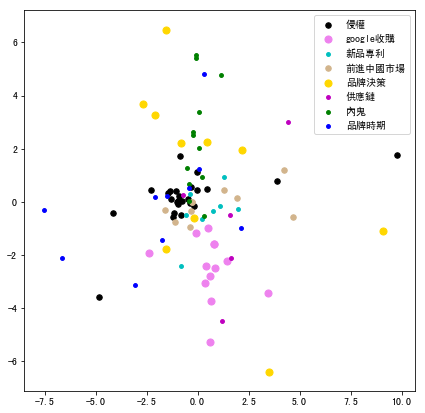

4 6


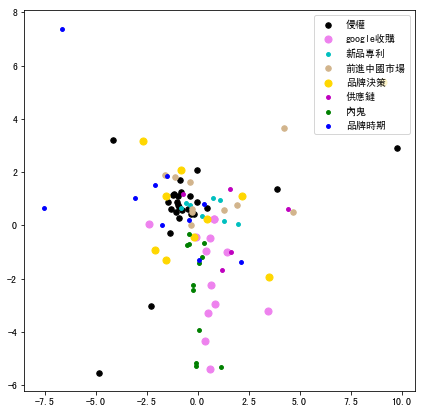

5 6


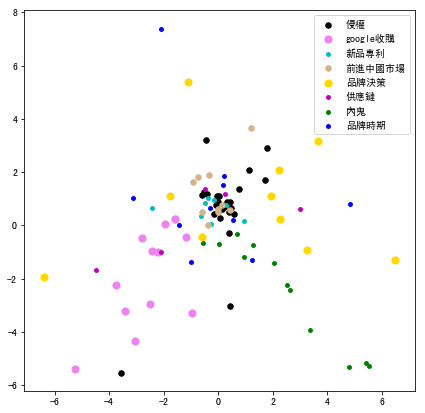

In [18]:
#Set a 3 KMeans clustering
#kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
#LABEL_COLOR_MAP = {0:'r', 1: 'g'}#,2: 'b'}# 3:'black'}
#label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
label=np.array(label_color)
#Plot the scatter digram
for i in range(7):
    for j in range(i+1,7):
        print(i,j)
        x=x_7d
        plt.figure(figsize = (7,7))
        idx_1 = np.where(label=='k')
        p1 = plt.scatter(x[idx_1,i], x[idx_1,j], color = 'k', label='侵權', s = 30)
        idx_2 = np.where(label=='violet')
        p2 = plt.scatter(x[idx_2,i], x[idx_2,j], color = 'violet', label='google收購', s = 50)
        idx_3 =np.where(label=='c')
        p3 = plt.scatter(x[idx_3,i], x[idx_3,j], color = 'c', label='新品專利', s = 15)
        idx_4 =np.where(label=='tan')
        p4 = plt.scatter(x[idx_4,i], x[idx_4,j], color = 'tan', label='前進中國市場', s = 30)
        idx_5 =np.where(label=='gold')
        p5 = plt.scatter(x[idx_5,i], x[idx_5,j], color = 'gold', label='品牌決策', s = 50)
        idx_6 =np.where(label=='m')
        p6 = plt.scatter(x[idx_6,i], x[idx_6,j], color = 'm', label='供應鏈', s = 15)
        idx_7 = np.where(label=='g')
        p7 = plt.scatter(x[idx_7,i], x[idx_7,j], color = 'g', label='內鬼', s = 15)
        idx_8 =np.where(label=='b')
        p8 = plt.scatter(x[idx_8,i], x[idx_8,j], color = 'b', label='品牌時期', s = 15)
        plt.legend(loc = 'upper right')
        plt.show()
# plt.scatter(x_7d[:,0],x_7d[:,1], c= label_color, alpha=1) 
# #plt.plot(x_7d[:,0],x_7d[:,1])
# plt.legend(label)  

